# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


In [1]:
# Import all the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

#import stopwords and text processing libraries
from nltk.corpus import stopwords


# Basic EDA on cnbc_headlines dataset

In [2]:
# Read csv file of cnbc headlines using pandas
df=pd.read_csv(r"D:\Cloudy_DataScience\PROJECTS\SentimentAnalysis\cnbc_headlines.csv")

In [3]:
df.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [4]:
# check the shape of cnbc headline dataset
df.shape

(3080, 3)

In [5]:
# Check all the columns in the cnbc headline dataset
df.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [6]:
# Check which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [7]:
# Check for missing values in all the columnns of cnbc headline dataset
df.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [8]:
 # drop nan values in cnbc headline dataset
df=df.dropna()
df.reset_index(inplace=True,drop=True)

In [9]:
# drop the duplicate rows in the dataset keep the first one
df.drop_duplicates(keep='first')

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2795,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2796,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2797,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2798,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [10]:
# check the shape of cnbc headline dataset
df.shape

(2800, 3)

# Basic EDA on Gaurdian headlines dataset

In [11]:
# Read csv file of gaurdian headlines using pandas
df2=pd.read_csv(r"D:\Cloudy_DataScience\PROJECTS\SentimentAnalysis\guardian_headlines.csv")

In [12]:
df2.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [13]:
#check the shape of gaurdian headline dataset
df2.shape

(17800, 2)

In [14]:
#check columns of gaurdian headline
df2.columns

Index(['Time', 'Headlines'], dtype='object')

In [15]:
# Check which columns are having categorical, numerical or boolean values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [16]:
# check null values in gaurdian headlines dataset
df2.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [17]:
# drop duplicate rows in headlines and keep the first one
df2.drop_duplicates(keep='first')

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


# Basic EDA on reuters headlines

In [18]:
# Read csv file of reuters headlines using using pandas
df3=pd.read_csv(r"D:\Cloudy_DataScience\PROJECTS\SentimentAnalysis\reuters_headlines.csv")

In [19]:
df3.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [20]:
#check the shape of reuters headlines dataset
df3.shape

(32770, 3)

In [21]:
#check the columns of reuters headline dataset
df3.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [22]:
# Check which columns are having categorical, numerical or boolean values
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [23]:
# Check for missing values in all the columnns of reuters headlines dataset
df3.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [24]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
df3.drop_duplicates(keep='first',inplace=True)
df3

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


# Making some functions that we will need  ahead

Preprocessing 

In [25]:
# create a function for preprocessing 
import string
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
output= string.punctuation

stopwordslist = stopwords.words('english')

def preprocessing(text):
    
  #convert all to lowercase
    lower=text.lower()

  #remove puntuations
    corrected=lower.translate(str.maketrans('', '', output))

  #remove stopword
    tokenwords=word_tokenize(corrected)
    result = [] 
    for w in tokenwords: 
        if w not in stopwordslist: 
            result.append(w)
    
  #stemming
    ps = PorterStemmer()
    stemwords = [ps.stem(w) for w in result]
    
    

  #lemmitizing
    lemmatizer = WordNetLemmatizer()
    lemmawords = [lemmatizer.lemmatize(w) for w in stemwords]
    
    return(" ".join(lemmawords))


  

In [26]:
# preprocessing('Hi my name is the deepak, What is yours?')

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [27]:
# import sentiment intensity analyzer

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer


# create sentiment intensity analyzer object
sid = SentimentIntensityAnalyzer()


In [28]:
#fuction to  decide sentiment as positive, negative and neutral
def sentiment_polarity(text):
    return sid.polarity_scores(text)['compound']

# Now working with description on datasets

In [29]:
# concatenate cnbc headlines dataset and reuters headline dataset
df_new=pd.concat([df,df3],axis=0)
df_new

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [30]:
#check the shape of this new dataset
df_new.shape

(35515, 3)

In [31]:
#make a copy of new dataset 
df_new_copy=df_new.copy()

In [32]:
# apply preprocessing to the description of new dataset
df_new.Description=df_new.Description.apply(preprocessing)

In [33]:
df_new

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...


In [34]:
# analyze polarity score of values in description and  add new column of it in dataset
df_new['ds_Score']=df_new.Description.apply(sentiment_polarity)

In [35]:
# apply the function  which decides sentiment to  polarity score column
def catogarizer(score):
    if score>0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_new['sentiment']=df_new.ds_Score.apply(catogarizer)
df_new

,Headlines,Time,Description,ds_Score,sentiment
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,-0.6597,Negative
...,...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000,Neutral
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000,Neutral
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732,Negative
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818,Negative


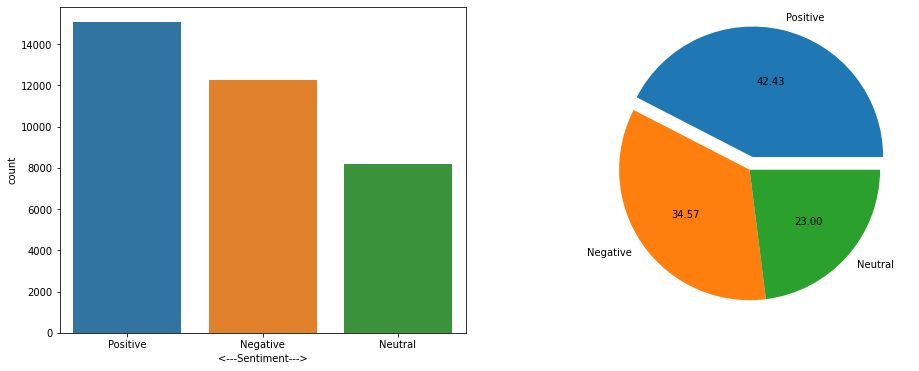

In [170]:
# plot a count plot on description score column
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(data=df_new,x='sentiment')
plt.xlabel('<---Sentiment--->')

plt.subplot(1,2,2)
plt.pie(df_new.sentiment.value_counts().values,labels=df_new.sentiment.value_counts().keys(),autopct= '%.2f',explode=[0.1,0,0])
plt.show()

In the description ,there are approx:

14000 positive statment<br>
12000 negative statment<br>
8000 neutral statment<br>

42.43% positive statments<br>
34.57% negtive statements<br>
23.0% neutral statments<br>

# Modelling on description 

In [38]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X=df_new.drop(columns=['sentiment','ds_Score'])
Y=df_new.sentiment
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [40]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

pipe_svc=Pipeline([
    ('TfidfVectorizer',TfidfVectorizer()),
    ('LinearSVC',LinearSVC())
])


# Fit the pipeline to the data

pipe_svc.fit(X_train.Description,Y_train)

# predict on test dataset
y_pred=pipe_svc.predict(X_test.Description)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.9321509009009009
[[1121   45   73]
 [  21  763   20]
 [  50   32 1427]]
              precision    recall  f1-score   support

    Negative       0.94      0.90      0.92      1239
     Neutral       0.91      0.95      0.93       804
    Positive       0.94      0.95      0.94      1509

    accuracy                           0.93      3552
   macro avg       0.93      0.93      0.93      3552
weighted avg       0.93      0.93      0.93      3552

CPU times: total: 1.33 s
Wall time: 1.32 s


LOGISTIC REGRESSION


In [41]:
%%time
from sklearn.linear_model import LogisticRegression
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pipe_logr=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('LogisticRegression',LogisticRegression())
])

# Fit the pipeline to the data

pipe_logr.fit(X_train.Description,Y_train)

# predict on test dataset
y_pred=pipe_logr.predict(X_test.Description)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.8944256756756757
[[1057   76  106]
 [  35  732   37]
 [  71   50 1388]]
              precision    recall  f1-score   support

    Negative       0.91      0.85      0.88      1239
     Neutral       0.85      0.91      0.88       804
    Positive       0.91      0.92      0.91      1509

    accuracy                           0.89      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.90      0.89      0.89      3552

CPU times: total: 2.47 s
Wall time: 2.54 s


MULTINOMIAL NAIVE BAYES


In [42]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pipe_mnb=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('MultinomialNB',MultinomialNB())
])

# Fit the pipeline to the data

pipe_mnb.fit(X_train.Description,Y_train)

# predict on test dataset
y_pred=pipe_mnb.predict(X_test.Description)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.6399211711711712
[[ 808    8  423]
 [ 150   87  567]
 [ 128    3 1378]]
              precision    recall  f1-score   support

    Negative       0.74      0.65      0.70      1239
     Neutral       0.89      0.11      0.19       804
    Positive       0.58      0.91      0.71      1509

    accuracy                           0.64      3552
   macro avg       0.74      0.56      0.53      3552
weighted avg       0.71      0.64      0.59      3552

CPU times: total: 703 ms
Wall time: 715 ms


BERNOULLI NAIVE BAYES


In [43]:
%%time
from sklearn.naive_bayes import BernoulliNB
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe_bnb=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('BernoulliNB',BernoulliNB())
])

# Fit the pipeline to the data

pipe_bnb.fit(X_train.Description,Y_train)

# predict on test dataset
y_pred=pipe_bnb.predict(X_test.Description)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.7393018018018018
[[ 919   56  264]
 [ 136  479  189]
 [ 210   71 1228]]
              precision    recall  f1-score   support

    Negative       0.73      0.74      0.73      1239
     Neutral       0.79      0.60      0.68       804
    Positive       0.73      0.81      0.77      1509

    accuracy                           0.74      3552
   macro avg       0.75      0.72      0.73      3552
weighted avg       0.74      0.74      0.74      3552

CPU times: total: 719 ms
Wall time: 717 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [44]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

pipe_gbc=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('GradientBoostingClassifier',GradientBoostingClassifier())
])

# Fit the pipeline to the data

pipe_gbc.fit(X_train.Description,Y_train)

# predict on test dataset
y_pred=pipe_gbc.predict(X_test.Description)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.8403716216216216
[[ 902  170  167]
 [  10  785    9]
 [  66  145 1298]]
              precision    recall  f1-score   support

    Negative       0.92      0.73      0.81      1239
     Neutral       0.71      0.98      0.82       804
    Positive       0.88      0.86      0.87      1509

    accuracy                           0.84      3552
   macro avg       0.84      0.85      0.84      3552
weighted avg       0.86      0.84      0.84      3552

CPU times: total: 54.4 s
Wall time: 54.5 s


XGBOOST CLASSIFICATION MODEL


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
%%time
from xgboost import XGBClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

pipe_xg=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('XGBClassifier',XGBClassifier())
])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(Y_train)
enc_test = encoder.fit_transform(Y_test)
# Fit the pipeline to the data

pipe_xg.fit(X_train.Description,enc_train)

# predict on test dataset
y_pred=pipe_xg.predict(X_test.Description)
# print accuracy score
print('Accuracy Score:',accuracy_score(enc_test,y_pred))
#print confusion matrix
print(confusion_matrix(enc_test,y_pred))
#print classification report
print(classification_report(enc_test,y_pred))


Accuracy Score: 0.8834459459459459
[[ 993  129  117]
 [  12  785    7]
 [  58   91 1360]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1239
           1       0.78      0.98      0.87       804
           2       0.92      0.90      0.91      1509

    accuracy                           0.88      3552
   macro avg       0.88      0.89      0.88      3552
weighted avg       0.89      0.88      0.88      3552

CPU times: total: 1min 32s
Wall time: 14.8 s


DECISION TREE CLASSIFICATION MODEL


In [47]:
%%time
from sklearn.tree import DecisionTreeClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

pipe_dt=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('DTC',DecisionTreeClassifier())
])



# Fit the pipeline to the data

pipe_dt.fit(X_train.Description,Y_train)

# predict on test dataset
y_pred=pipe_dt.predict(X_test.Description)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.8733108108108109
[[1018   21  200]
 [  15  777   12]
 [ 190   12 1307]]
              precision    recall  f1-score   support

    Negative       0.83      0.82      0.83      1239
     Neutral       0.96      0.97      0.96       804
    Positive       0.86      0.87      0.86      1509

    accuracy                           0.87      3552
   macro avg       0.88      0.88      0.88      3552
weighted avg       0.87      0.87      0.87      3552

CPU times: total: 15.2 s
Wall time: 14.9 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [48]:
%%time
from sklearn.neighbors import KNeighborsClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

pipe_knn=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('DTC',KNeighborsClassifier())
])



# Fit the pipeline to the data

pipe_knn.fit(X_train.Description,Y_train)


# predict on test dataset
y_pred=pipe_knn.predict(X_test.Description)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.5509572072072072
[[816 170 253]
 [256 292 256]
 [393 267 849]]
              precision    recall  f1-score   support

    Negative       0.56      0.66      0.60      1239
     Neutral       0.40      0.36      0.38       804
    Positive       0.63      0.56      0.59      1509

    accuracy                           0.55      3552
   macro avg       0.53      0.53      0.53      3552
weighted avg       0.55      0.55      0.55      3552

CPU times: total: 3.53 s
Wall time: 3.55 s


In [49]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [50]:
# helper function for comparing models matric
def score(model_obj,model_names,X_test,y_test):
    metrics_df=pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df.model_names=model_names
    
    metrics_df.accuracy=[accuracy_score(y_test,model.predict(X_test)) if model != pipe_xg else accuracy_score(enc_test,model.predict(X_test)) for model in model_obj]
    
    metrics_df.precision=[precision_score(y_test,model.predict(X_test),average='weighted') if model != pipe_xg else precision_score(enc_test,model.predict(X_test),average='weighted') for model in model_obj]
    
    metrics_df.recall=[recall_score(y_test,model.predict(X_test),average='weighted') if model != pipe_xg else recall_score(enc_test,model.predict(X_test),average='weighted') for model in model_obj]
    
    metrics_df.f1_score=[f1_score(y_test,model.predict(X_test),average='weighted') if model != pipe_xg else f1_score(enc_test,model.predict(X_test),average='weighted') for model in model_obj]

   
    return metrics_df
    

In [51]:
# list of model objects
model_objects = [pipe_svc,pipe_logr,pipe_mnb,pipe_bnb,pipe_gbc,pipe_xg,pipe_dt,pipe_knn]
# list of model name
names=['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost','Decision Tree','KNN']
# print the comparison of models
score(model_objects,names,X_test.Description,Y_test)

,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.932151,0.932481,0.932151,0.932090
1,LogRegression,0.894426,0.895287,0.894426,0.894317
2,MultinomialNB,0.639921,0.707690,0.639921,0.588106
3,BernoulliNB,0.739302,0.742671,0.739302,0.736911
4,GradientBoost,0.840372,0.857349,0.840372,0.840197
5,XGBoost,0.883446,0.891982,0.883446,0.883462
6,Decision Tree,0.873311,0.873018,0.873311,0.873145
7,KNN,0.550957,0.550553,0.550957,0.548367


LinearSVC is performing Best accuracy of **93.21** and f1 score of **93.20**

# working with test dataset

In [52]:
# Perforn the prediction on the test dataset
y_predicted=pipe_svc.predict(X_test.Description)
y_predicted

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [53]:
# creating a dataframe of predicted results 
pred_svc1=pd.DataFrame({'Predicted':y_predicted,'True':Y_test})

In [54]:
pred_svc1.head()

,Predicted,True
24688,Negative,Negative
26461,Positive,Positive
10242,Positive,Positive
11483,Positive,Positive
26934,Negative,Negative


# Now working with headlines + description

In [52]:
# merge headlines and description of new dataset and name it info
mergerd_df_new=df_new.copy()
mergerd_df_new['info']=mergerd_df_new['Headlines']+mergerd_df_new['Description']
mergerd_df_new

,Headlines,Time,Description,ds_Score,sentiment,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,-0.6597,Negative,Wall Street delivered the 'kind of pullback I'...
...,...,...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000,Neutral,Malaysia says never hired British data firm at...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000,Neutral,Prosecutors search Volkswagen headquarters in ...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732,Negative,McDonald's sets greenhouse gas reduction targe...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818,Negative,Pratt & Whitney to deliver spare A320neo engin...


In [53]:
# only keep info and time column . drop all remaining columns
mergerd_df_new=mergerd_df_new[['Time','info']]
mergerd_df_new.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [54]:
# apply preprocessing on info column
mergerd_df_new['info']=mergerd_df_new['info'].apply(preprocessing)

In [55]:
# analyze polarity score of values in info and  add new column of it in dataset
mergerd_df_new['info_score']=mergerd_df_new['info'].apply(sentiment_polarity)

In [56]:
mergerd_df_new.head()

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,0.3612
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2500


In [57]:
# apply the function  which decides sentiment to  polarity score column
mergerd_df_new.info_score=mergerd_df_new.info_score.apply(catogarizer)
mergerd_df_new.head()

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative


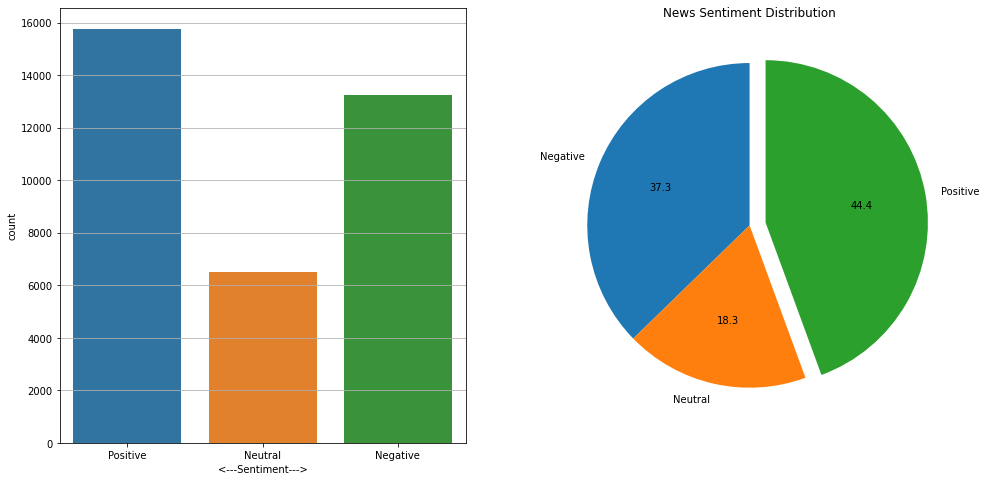

In [171]:
# perform count plot on info_score column
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.grid()
sns.countplot(data=mergerd_df_new,x='info_score')
plt.xlabel('<---Sentiment--->')

plt.subplot(1,2,2)
plt.title('News Sentiment Distribution')
plt.pie(mergerd_df_new.groupby('info_score').count()['info'],labels=mergerd_df_new.groupby('info_score').count()['info'].keys(),
       autopct='%.1f',explode=[0,0,0.1],startangle=90)

plt.show()

In the info there are approx

15500 positive statment<br>
13000 negative statment<br>
6500 neutral statment<br>

44.4% positive statments<br>
37.3% negtive statements<br>
18.3% neutral statments<br>

# modeling on headlines + description

In [60]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X=mergerd_df_new['info']
Y=mergerd_df_new.info_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

pipe_svc2=Pipeline([
    ('TfidfVectorizer',TfidfVectorizer()),
    ('LinearSVC',LinearSVC())
])


# Fit the pipeline to the data

pipe_svc2.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_svc2.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.9017454954954955
[[1184   50   84]
 [  40  543   55]
 [  71   49 1476]]
              precision    recall  f1-score   support

    Negative       0.91      0.90      0.91      1318
     Neutral       0.85      0.85      0.85       638
    Positive       0.91      0.92      0.92      1596

    accuracy                           0.90      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.90      0.90      0.90      3552

CPU times: total: 1.55 s
Wall time: 1.55 s


LOGISTIC REGRESSION


In [63]:
%%time
from sklearn.linear_model import LogisticRegression
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pipe_logr2=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('LogisticRegression',LogisticRegression())
])

# Fit the pipeline to the data

pipe_logr2.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_logr2.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.8662725225225225
[[1144   59  115]
 [  79  470   89]
 [  86   47 1463]]
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      1318
     Neutral       0.82      0.74      0.77       638
    Positive       0.88      0.92      0.90      1596

    accuracy                           0.87      3552
   macro avg       0.86      0.84      0.85      3552
weighted avg       0.87      0.87      0.87      3552

CPU times: total: 3.62 s
Wall time: 3.6 s


MULTINOMIAL NAIVE BAYES


In [64]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pipe_mnb2=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('MultinomialNB',MultinomialNB())
])

# Fit the pipeline to the data

pipe_mnb2.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_mnb2.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.6438626126126126
[[ 833    0  485]
 [ 132   11  495]
 [ 151    2 1443]]
              precision    recall  f1-score   support

    Negative       0.75      0.63      0.68      1318
     Neutral       0.85      0.02      0.03       638
    Positive       0.60      0.90      0.72      1596

    accuracy                           0.64      3552
   macro avg       0.73      0.52      0.48      3552
weighted avg       0.70      0.64      0.58      3552

CPU times: total: 938 ms
Wall time: 928 ms


BERNOULLI NAIVE BAYES


In [65]:
%%time
from sklearn.naive_bayes import BernoulliNB
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe_bnb2=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('BernoulliNB',BernoulliNB())
])

# Fit the pipeline to the data

pipe_bnb2.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_bnb2.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.6894707207207207
[[ 982   13  323]
 [ 176  141  321]
 [ 250   20 1326]]
              precision    recall  f1-score   support

    Negative       0.70      0.75      0.72      1318
     Neutral       0.81      0.22      0.35       638
    Positive       0.67      0.83      0.74      1596

    accuracy                           0.69      3552
   macro avg       0.73      0.60      0.60      3552
weighted avg       0.71      0.69      0.66      3552

CPU times: total: 906 ms
Wall time: 904 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [66]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

pipe_gbc2=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('GradientBoostingClassifier',GradientBoostingClassifier())
])

# Fit the pipeline to the data

pipe_gbc2.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_gbc2.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.7646396396396397
[[ 945   74  299]
 [   5  330  303]
 [  98   57 1441]]
              precision    recall  f1-score   support

    Negative       0.90      0.72      0.80      1318
     Neutral       0.72      0.52      0.60       638
    Positive       0.71      0.90      0.79      1596

    accuracy                           0.76      3552
   macro avg       0.77      0.71      0.73      3552
weighted avg       0.78      0.76      0.76      3552

CPU times: total: 1min 5s
Wall time: 1min 5s


XGBOOST CLASSIFICATION MODEL


In [80]:
from sklearn.preprocessing import LabelEncoder

In [67]:
%%time
from xgboost import XGBClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

pipe_xg2=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('XGBClassifier',XGBClassifier())
])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(Y_train)
enc_test = encoder.fit_transform(Y_test)
# Fit the pipeline to the data

pipe_xg2.fit(X_train,enc_train)

# predict on test dataset
y_pred=pipe_xg2.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(enc_test,y_pred))
#print confusion matrix
print(confusion_matrix(enc_test,y_pred))
#print classification report
print(classification_report(enc_test,y_pred))


Accuracy Score: 0.8828828828828829
[[1072  109  137]
 [   3  626    9]
 [  82   76 1438]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1318
           1       0.77      0.98      0.86       638
           2       0.91      0.90      0.90      1596

    accuracy                           0.88      3552
   macro avg       0.87      0.90      0.88      3552
weighted avg       0.89      0.88      0.88      3552

CPU times: total: 1min 56s
Wall time: 17.6 s


DECISION TREE CLASSIFICATION MODEL


In [68]:
%%time
from sklearn.tree import DecisionTreeClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

pipe_dt2=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('DTC',DecisionTreeClassifier())
])



# Fit the pipeline to the data

pipe_dt2.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_dt2.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.8330518018018018
[[1016   34  268]
 [  17  612    9]
 [ 243   22 1331]]
              precision    recall  f1-score   support

    Negative       0.80      0.77      0.78      1318
     Neutral       0.92      0.96      0.94       638
    Positive       0.83      0.83      0.83      1596

    accuracy                           0.83      3552
   macro avg       0.85      0.85      0.85      3552
weighted avg       0.83      0.83      0.83      3552

CPU times: total: 16.7 s
Wall time: 16.2 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [69]:
%%time
from sklearn.neighbors import KNeighborsClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

pipe_knn2=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('DTC',KNeighborsClassifier())
])



# Fit the pipeline to the data

pipe_knn2.fit(X_train,Y_train)


# predict on test dataset
y_pred=pipe_knn2.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.567286036036036
[[892 119 307]
 [221 188 229]
 [455 206 935]]
              precision    recall  f1-score   support

    Negative       0.57      0.68      0.62      1318
     Neutral       0.37      0.29      0.33       638
    Positive       0.64      0.59      0.61      1596

    accuracy                           0.57      3552
   macro avg       0.52      0.52      0.52      3552
weighted avg       0.56      0.57      0.56      3552

CPU times: total: 3.81 s
Wall time: 3.79 s


In [74]:
def score(model_obj,model_names,X_test,y_test):
    metrics_df=pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df.model_names=model_names
    
    metrics_df.accuracy=[accuracy_score(y_test,model.predict(X_test)) if model != pipe_xg2 else accuracy_score(enc_test,model.predict(X_test)) for model in model_obj]
    
    metrics_df.precision=[precision_score(y_test,model.predict(X_test),average='weighted') if model != pipe_xg2 else precision_score(enc_test,model.predict(X_test),average='weighted') for model in model_obj]
    
    metrics_df.recall=[recall_score(y_test,model.predict(X_test),average='weighted') if model != pipe_xg2 else recall_score(enc_test,model.predict(X_test),average='weighted') for model in model_obj]
    
    metrics_df.f1_score=[f1_score(y_test,model.predict(X_test),average='weighted') if model != pipe_xg2 else f1_score(enc_test,model.predict(X_test),average='weighted') for model in model_obj]

   
    return metrics_df

In [75]:
# list of model objects

model_objects = [pipe_svc2,pipe_logr2,pipe_mnb2,pipe_bnb2,pipe_gbc2,pipe_xg2,pipe_dt2,pipe_knn2]
# list of model name
names=['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost','Decision Tree','KNN']
# print the comparison of models
score(model_objects,names,X_test,Y_test)

,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.901745,0.901825,0.901745,0.901743
1,LogRegression,0.866273,0.865187,0.866273,0.865171
2,MultinomialNB,0.643863,0.696540,0.643863,0.582703
3,BernoulliNB,0.689471,0.706783,0.689471,0.663874
4,GradientBoost,0.764640,0.780091,0.764640,0.760130
5,XGBoost,0.882883,0.890352,0.882883,0.883001
6,Decision Tree,0.833052,0.831932,0.833052,0.832322
7,KNN,0.567286,0.562512,0.567286,0.562009


# working with test data

In [76]:
# Perforn the prediction on the test dataset
prediction_test=pipe_svc2.predict(X_test)
prediction_test

array(['Negative', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [77]:
# creating a dataframe of predicted results 
pred_hl_ds=pd.DataFrame({'Predicted':prediction_test,'True':Y_test})
pred_hl_ds

,Predicted,True
24688,Negative,Negative
26461,Negative,Negative
10242,Positive,Positive
11483,Positive,Positive
26934,Negative,Negative
...,...,...
20513,Negative,Negative
11821,Positive,Positive
32619,Positive,Positive
30179,Positive,Positive


# now working on headlines

In [78]:
# from the dataset you have copied before delete the column of description
df_new_copy_hl=df_new_copy.drop('Description',axis=1)

In [79]:
# remane the date column in gaurdian headlines dataset  to time
df_new_copy_hl=pd.concat([df2,df_new_copy_hl],axis=0)
df_new_copy_hl.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [80]:
# check the shape of all headlines dataset
df_new_copy_hl.shape

(53315, 2)

In [81]:
#apply preprocessin to the headlines column in the new dataset
df_new_copy_hl['Headlines']=df_new_copy_hl['Headlines'].apply(preprocessing)

In [82]:
# analyze polarity score of values in headlines and  add new column of it in dataset
df_new_copy_hl['hl_score']=df_new_copy_hl.Headlines.apply(sentiment_polarity)
df_new_copy_hl

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,0.0000
1,18-Jul-20,‘ fear worst ’ four grim tale work life upend ...,-0.9001
2,18-Jul-20,five key area sunak must tackl serv econom rec...,0.0000
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,-0.5423
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...,-0.4939
...,...,...,...
32765,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32766,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32767,Mar 20 2018,mcdonald set greenhous ga reduct target,0.0000
32768,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,0.0000


In [83]:
# apply the function  which decides sentiment to  polarity score column
df_new_copy_hl['hl_score']=df_new_copy_hl.hl_score.apply(catogarizer)

In [84]:
df_new_copy_hl.head()

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear worst ’ four grim tale work life upend ...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...,Negative


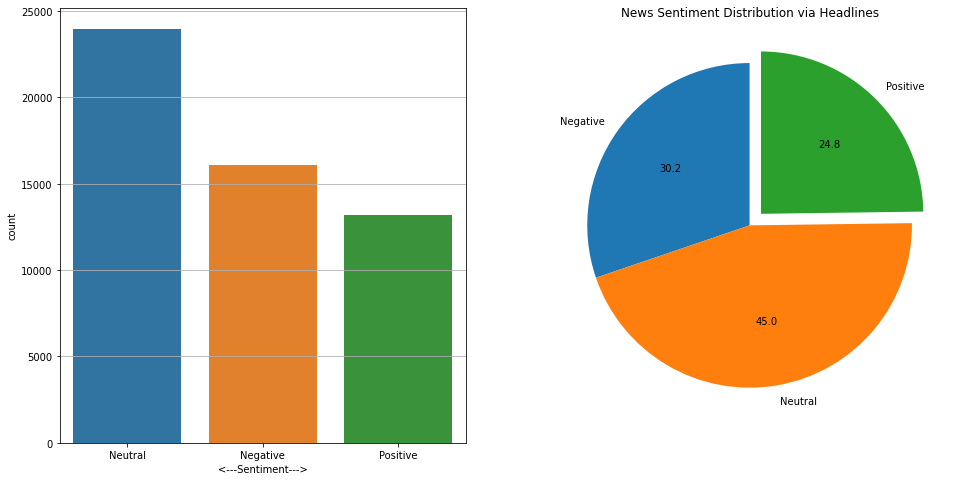

In [172]:
#perform countplot on headline score column

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.grid()
sns.countplot(data=df_new_copy_hl,x='hl_score')
plt.xlabel('<---Sentiment--->')


plt.subplot(1,2,2)
plt.title('News Sentiment Distribution via Headlines')
plt.pie(df_new_copy_hl.groupby('hl_score').count()['Headlines'],labels=df_new_copy_hl.groupby('hl_score').count()['Headlines'].keys(),
       autopct='%.1f',explode=[0,0,0.1],startangle=90)
plt.show()

In the headlines
there are approx:

14000 positive statment<br>
16000 negative statment<br>
24000 neutral statment<br>

24.8% positive statments<br>
30.2% negtive statements<br>
45.0% neutral statments

# Modeling on headlines

In [87]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X=df_new_copy_hl['Headlines']
Y=df_new_copy_hl.hl_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [89]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

pipe_svc3=Pipeline([
    ('TfidfVectorizer',TfidfVectorizer()),
    ('LinearSVC',LinearSVC())
])


# Fit the pipeline to the data

pipe_svc3.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_svc3.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.9713053263315828
[[1513   30   48]
 [   6 2340    9]
 [  39   21 1326]]
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1591
     Neutral       0.98      0.99      0.99      2355
    Positive       0.96      0.96      0.96      1386

    accuracy                           0.97      5332
   macro avg       0.97      0.97      0.97      5332
weighted avg       0.97      0.97      0.97      5332

CPU times: total: 1.22 s
Wall time: 1.22 s


LOGISTIC REGRESSION


In [90]:
%%time
from sklearn.linear_model import LogisticRegression
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pipe_logr3=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('LogisticRegression',LogisticRegression())
])

# Fit the pipeline to the data

pipe_logr3.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_logr3.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.9328582145536384
[[1413  119   59]
 [   7 2340    8]
 [  54  111 1221]]
              precision    recall  f1-score   support

    Negative       0.96      0.89      0.92      1591
     Neutral       0.91      0.99      0.95      2355
    Positive       0.95      0.88      0.91      1386

    accuracy                           0.93      5332
   macro avg       0.94      0.92      0.93      5332
weighted avg       0.93      0.93      0.93      5332

CPU times: total: 2 s
Wall time: 2.07 s


MULTINOMIAL NAIVE BAYES


In [91]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pipe_mnb3=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('MultinomialNB',MultinomialNB())
])

# Fit the pipeline to the data

pipe_mnb3.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_mnb3.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.8394598649662416
[[1335  196   60]
 [  54 2273   28]
 [ 200  318  868]]
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84      1591
     Neutral       0.82      0.97      0.88      2355
    Positive       0.91      0.63      0.74      1386

    accuracy                           0.84      5332
   macro avg       0.85      0.81      0.82      5332
weighted avg       0.85      0.84      0.83      5332

CPU times: total: 562 ms
Wall time: 564 ms


BERNOULLI NAIVE BAYES


In [92]:
%%time
from sklearn.naive_bayes import BernoulliNB
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe_bnb3=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('BernoulliNB',BernoulliNB())
])

# Fit the pipeline to the data

pipe_bnb3.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_bnb3.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.88615903975994
[[1416   62  113]
 [ 123 2160   72]
 [ 174   63 1149]]
              precision    recall  f1-score   support

    Negative       0.83      0.89      0.86      1591
     Neutral       0.95      0.92      0.93      2355
    Positive       0.86      0.83      0.84      1386

    accuracy                           0.89      5332
   macro avg       0.88      0.88      0.88      5332
weighted avg       0.89      0.89      0.89      5332

CPU times: total: 562 ms
Wall time: 567 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [93]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

pipe_gbc3=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('GradientBoostingClassifier',GradientBoostingClassifier())
])

# Fit the pipeline to the data

pipe_gbc3.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_gbc3.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.79576144036009
[[ 988  522   81]
 [   3 2346    6]
 [  71  406  909]]
              precision    recall  f1-score   support

    Negative       0.93      0.62      0.74      1591
     Neutral       0.72      1.00      0.83      2355
    Positive       0.91      0.66      0.76      1386

    accuracy                           0.80      5332
   macro avg       0.85      0.76      0.78      5332
weighted avg       0.83      0.80      0.79      5332

CPU times: total: 34 s
Wall time: 34 s


XGBOOST CLASSIFICATION MODEL


In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
%%time
from xgboost import XGBClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

pipe_xg3=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('XGBClassifier',XGBClassifier())
])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(Y_train)
enc_test = encoder.fit_transform(Y_test)
# Fit the pipeline to the data

pipe_xg3.fit(X_train,enc_train)

# predict on test dataset
y_pred=pipe_xg3.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(enc_test,y_pred))
#print confusion matrix
print(confusion_matrix(enc_test,y_pred))
#print classification report
print(classification_report(enc_test,y_pred))


Accuracy Score: 0.8981620405101275
[[1292  237   62]
 [   3 2346    6]
 [  36  199 1151]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1591
           1       0.84      1.00      0.91      2355
           2       0.94      0.83      0.88      1386

    accuracy                           0.90      5332
   macro avg       0.92      0.88      0.89      5332
weighted avg       0.91      0.90      0.90      5332

CPU times: total: 57.4 s
Wall time: 8.8 s


DECISION TREE CLASSIFICATION MODEL


In [96]:
%%time
from sklearn.tree import DecisionTreeClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

pipe_dt3=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('DTC',DecisionTreeClassifier())
])



# Fit the pipeline to the data

pipe_dt3.fit(X_train,Y_train)

# predict on test dataset
y_pred=pipe_dt3.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.9504876219054764
[[1456   18  117]
 [   7 2345    3]
 [ 106   13 1267]]
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.92      1591
     Neutral       0.99      1.00      0.99      2355
    Positive       0.91      0.91      0.91      1386

    accuracy                           0.95      5332
   macro avg       0.94      0.94      0.94      5332
weighted avg       0.95      0.95      0.95      5332

CPU times: total: 14 s
Wall time: 13.6 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [97]:
%%time
from sklearn.neighbors import KNeighborsClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

pipe_knn3=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('TfidTransformer',TfidfTransformer()),
    ('DTC',KNeighborsClassifier())
])



# Fit the pipeline to the data

pipe_knn3.fit(X_train,Y_train)


# predict on test dataset
y_pred=pipe_knn3.predict(X_test)
# print accuracy score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
#print confusion matrix
print(confusion_matrix(Y_test,y_pred))
#print classification report
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.605026256564141
[[ 978  526   87]
 [ 487 1714  154]
 [ 288  564  534]]
              precision    recall  f1-score   support

    Negative       0.56      0.61      0.58      1591
     Neutral       0.61      0.73      0.66      2355
    Positive       0.69      0.39      0.49      1386

    accuracy                           0.61      5332
   macro avg       0.62      0.58      0.58      5332
weighted avg       0.62      0.61      0.60      5332

CPU times: total: 4.38 s
Wall time: 4.38 s


In [98]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [99]:
# helper function for comparing models matric
def score(model_obj,model_names,X_test,y_test):
    metrics_df=pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df.model_names=model_names
    
    metrics_df.accuracy=[accuracy_score(y_test,model.predict(X_test)) if model != pipe_xg3 else accuracy_score(enc_test,model.predict(X_test)) for model in model_obj]
    
    metrics_df.precision=[precision_score(y_test,model.predict(X_test),average='weighted') if model != pipe_xg3 else precision_score(enc_test,model.predict(X_test),average='weighted') for model in model_obj]
    
    metrics_df.recall=[recall_score(y_test,model.predict(X_test),average='weighted') if model != pipe_xg3 else recall_score(enc_test,model.predict(X_test),average='weighted') for model in model_obj]
    
    metrics_df.f1_score=[f1_score(y_test,model.predict(X_test),average='weighted') if model != pipe_xg3 else f1_score(enc_test,model.predict(X_test),average='weighted') for model in model_obj]

   
    return metrics_df
    

In [100]:
# list of model objects

model_objects = [pipe_svc3,pipe_logr3,pipe_mnb3,pipe_bnb3,pipe_gbc3,pipe_xg3,pipe_dt3,pipe_knn3]
# list of model name
names=['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost','Decision Tree','KNN']
# print the comparison of models
score(model_objects,names,X_test,Y_test)

,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.971305,0.971247,0.971305,0.971220
1,LogRegression,0.932858,0.934603,0.932858,0.932208
2,MultinomialNB,0.839460,0.846919,0.839460,0.833692
3,BernoulliNB,0.886159,0.888055,0.886159,0.886584
4,GradientBoost,0.795761,0.831313,0.795761,0.788789
5,XGBoost,0.898162,0.907537,0.898162,0.896989
6,Decision Tree,0.950488,0.950258,0.950488,0.950351
7,KNN,0.605026,0.615559,0.605026,0.596480


**LinearSVC** is performing the best

# now working with test data

In [101]:
# Perforn the prediction on the test dataset
pred_hl=pipe_svc3.predict(X_test)
pred_hl

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [102]:
# creating a dataframe of predicted results 
pred_svc1=pd.DataFrame({'Predicted':pred_hl,'True':Y_test})

In [103]:
pred_svc1.head()

,Predicted,True
14212,Positive,Positive
9647,Positive,Positive
10879,Negative,Negative
22772,Neutral,Neutral
15357,Negative,Negative


In [149]:
pred_svc1.groupby('Predicted').count().values.ravel()

array([1558, 2391, 1383], dtype=int64)

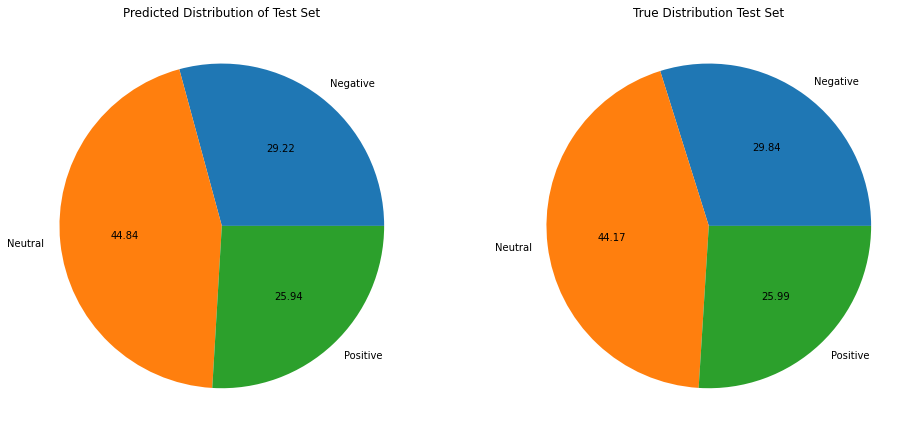

In [162]:


plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Predicted Distribution of Test Set')
plt.pie(pred_svc1.groupby('Predicted').count().values.ravel(),labels=pred_svc1.groupby('Predicted').count().index,autopct='%.2f')

plt.subplot(1,2,2)
plt.title('True Distribution Test Set')
plt.pie(pred_svc1.groupby('True').count().values.ravel(),labels=pred_svc1.groupby('True').count().index,autopct='%.2f')

plt.show()

# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [104]:
sent1 = ['September Is Usually a Bad Month For Stocks. This One Could Be Ugly.']
y_predict = pipe_svc.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [105]:
sent2 = ["India's GDP growth projected to spike to four-quarter high of 13.0% in Q1"]
y_predict = pipe_svc.predict(sent2)
y_predict

array(['Positive'], dtype=object)

In [137]:
sent3 = "Food banks warn surge in demand will prevent feeding hungriest this winter"
sent3=preprocessing(sent3)
sent3=[sent3]
y_predict = pipe_svc2.predict(sent3)
y_predict

array(['Negative'], dtype=object)

# Conclusion

According to above tests **LinearSVC** is performing best